In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm


# Načtení dat ze souboru 


In [2]:
aku = pd.read_csv('aku.csv', sep=';', index_col=0) #sep: oddělovač, index_col: číslo sloupce s indexem řádku (soubor jej nemusí obsahovat)

In [3]:
aku

,vyrobce,kapacita_5,kapacita_100
cislo,,,
1,A,1996,1717
2,A,2053,2134
3,A,2087,1981
4,A,2026,1834
5,A,2039,1941
...,...,...,...
124,D,2039,1795
125,D,2021,1948
126,D,2070,1858


In [4]:
aku.columns # názvy slupců v datovém souboru

Index(['vyrobce', 'kapacita_5', 'kapacita_100'], dtype='object')

In [5]:
aku.head() # výpis prvních řádků souboru

,vyrobce,kapacita_5,kapacita_100
cislo,,,
1,A,1996,1717
2,A,2053,2134
3,A,2087,1981
4,A,2026,1834
5,A,2039,1941


In [6]:
aku['vyrobce'].dtype # data ve slpupci jsou v obecného typu "object"

dtype('O')

In [49]:
# sloupec lze převést na typ Category
aku['vyrobce']=aku['vyrobce'].astype('category')
# pro data typu Category můžeme zvolit vlastní pořadí kategorií (hodnot) 
aku['vyrobce']=aku['vyrobce'].cat.as_ordered() 
aku['vyrobce']=aku['vyrobce'].cat.reorder_categories(['C', 'B', 'A', 'D'])

In [8]:
aku['vyrobce'] # v posledním řádku vidíme, že kategorie jsou uspořádány podle zadaného pořadí

cislo
1      A
2      A
3      A
4      A
5      A
      ..
124    D
125    D
126    D
127    D
128    D
Name: vyrobce, Length: 128, dtype: category
Categories (4, object): ['C' < 'B' < 'A' < 'D']

# Explorační analýza

## Explorační analýza kategoriální proměnné

In [9]:
# četnosti výskytu jednotlivých kategorií
aku['vyrobce'].value_counts()

C    32
B    32
A    32
D    32
Name: vyrobce, dtype: int64

<AxesSubplot:ylabel='vyrobce'>

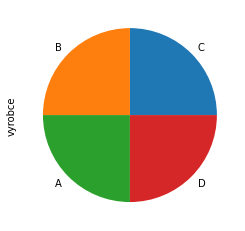

In [10]:
# koláčový graf
aku['vyrobce'].value_counts().plot.pie()

Text(0, 0.5, 'počet akumulátorů')

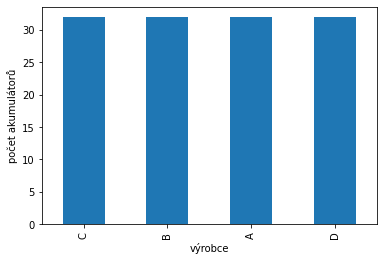

In [11]:
# sloupcový graf
aku['vyrobce'].value_counts().plot.bar()
plt.xlabel("výrobce")
plt.ylabel("počet akumulátorů")

## Explorační analýza kvantitativních proměnných

In [12]:
# základní numerické charakteristiky
aku.describe()

,kapacita_5,kapacita_100
count,128.00000,128.000000
mean,1987.93750,1828.492188
std,142.30309,179.292529
min,732.00000,620.000000
25%,1969.75000,1773.500000
50%,2005.00000,1846.000000
75%,2041.25000,1928.250000
max,2129.00000,2134.000000


Text(0, 0.5, 'četnost výskytu')

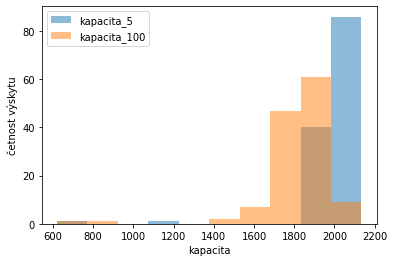

In [13]:
# histogramy
aku.plot.hist(alpha=0.5) 
plt.xlabel("kapacita")
plt.ylabel("četnost výskytu")

Text(0, 0.5, 'kapacita')

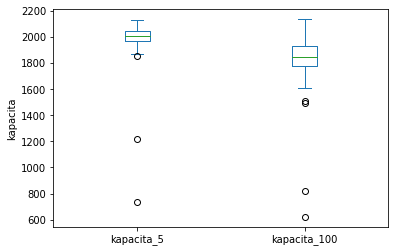

In [14]:
# krabicové grafy
aku.plot.box()
plt.ylabel("kapacita")

In [15]:
# výpis řádků obsahujících odlehlá pozorování ve sloupci kapacit po 5 cyklech  (podle metody vnitřních hradeb)
Q1_5=aku['kapacita_5'].quantile(0.25)
Q3_5=aku['kapacita_5'].quantile(0.75)
IQR_5 = Q3_5-Q1_5
out_5 = (aku['kapacita_5']<(Q1_5-1.5*IQR_5)) | (aku['kapacita_5']>(Q3_5+1.5*IQR_5))
aku[out_5]

,vyrobce,kapacita_5,kapacita_100
cislo,,,
20,A,732,620
33,B,1854,1841
88,C,1221,823


In [16]:
# ponecháme jen řádky obsahující v obou sloupcích hodnoty nad 1500 mAh (zbylé akumulároty jsou považovány za vadné)
aku = aku[(aku['kapacita_5']>=1500)&(aku['kapacita_100']>=1500)].copy() 

Text(0, 0.5, 'četnost výskytu')

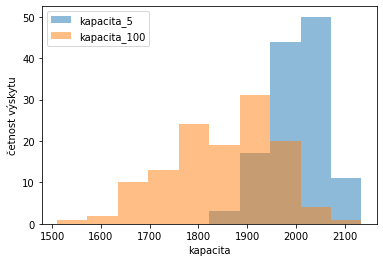

In [17]:
# histogramy po odstranění vadných akumulátorů
aku.plot.hist(alpha=0.5)
plt.xlabel("kapacita")
plt.ylabel("četnost výskytu")

Text(0, 0.5, 'kapacita')

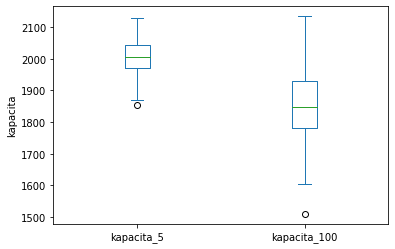

In [18]:
# krabicové grafy po odstranění vadných akumulátorů
aku.plot.box()
plt.ylabel("kapacita")

In [19]:
# základní charakteristiky pro data očištěná od odlehých pozorování
aku.describe()

,kapacita_5,kapacita_100
count,125.000000,125.000000
mean,2004.328000,1848.864000
std,54.768247,108.085341
min,1854.000000,1510.000000
25%,1971.000000,1783.000000
50%,2007.000000,1847.000000
75%,2042.000000,1929.000000
max,2129.000000,2134.000000


## Závislost dvou kvantitativních proměnných

<AxesSubplot:xlabel='kapacita_5', ylabel='kapacita_100'>

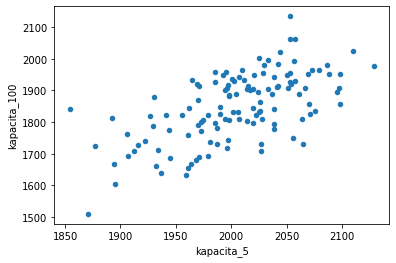

In [20]:
# bodový graf závislosti kapacit po 5 a kapacit po 100 cyklech
aku.plot.scatter(x='kapacita_5', y='kapacita_100')
# z rozložení bodů v grafu lze usoudit, že hodnoty kapacit po 5 a po 100 cyklech jsou vzájemně závislé

In [21]:
# Pearsonvy korelační koeficienty (bodové odhady korelací)
aku.corr() # pomocí pandas

,kapacita_5,kapacita_100
kapacita_5,1.000000,0.621874
kapacita_100,0.621874,1.000000


In [22]:
np.corrcoef(aku['kapacita_5'], aku['kapacita_100']) # totéž pomocí numpy

array([[1.       , 0.6218736],
       [0.6218736, 1.       ]])

## Explorační analýza závislosti kvantitativní a kategoriální proměnné

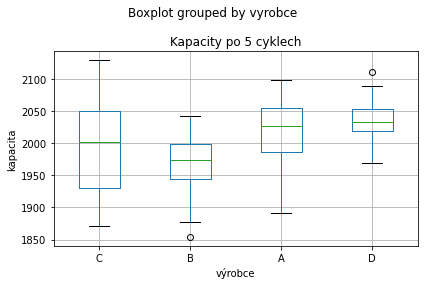

In [23]:
# krabicové grafy kapacit po 5 cyklech v zavislosti na vyrobci
aku.boxplot(column=['kapacita_5'], by=['vyrobce']);
plt.title('Kapacity po 5 cyklech')
plt.xlabel('výrobce')
plt.ylabel('kapacita')
plt.tight_layout() # upravi mezery kolem grafu
# výrazné posunutí krabicových grafů (např. B proti D) naznačuje závislost kapacity po 5 cyklech na výrobci

## Explorační analýza závislosti dvou kategoriálních proměnných

In [24]:
# pokles kapacit mezi 5. a 100. cyklem (přidáme jako další sloupec datového rámce)
aku['pokles']=aku['kapacita_5']-aku['kapacita_100']

In [25]:
# relativní pokles
aku['rel_pokles']=aku['pokles']/aku['kapacita_5']

In [26]:
# je relativní pokles > 0.1 ?
aku['pokles_nad10p'] = aku['rel_pokles']>0.1

In [27]:
# kontingenční tabulka (tabulka absolutních četností dvojic (výrobce, pokles > 0.1))
crt = pd.crosstab(aku['vyrobce'], aku['pokles_nad10p'])

In [28]:
crt

pokles_nad10p,False,True
vyrobce,,
C,17,14
B,27,5
A,16,14
D,29,3


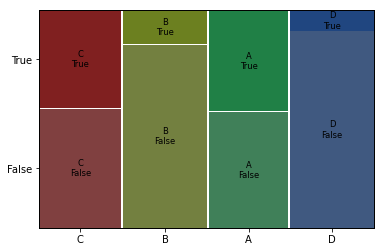

In [29]:
# mozaikový graf (grafické znázornění kontingeční tabulky)
mosaic(aku, ['vyrobce', 'pokles_nad10p']);
# výrazně rozdílné poměry výšek buněk v jednotlivých sloupcích nazačují závislsot mezi poklesem a výrobcem

## Ověření normality 

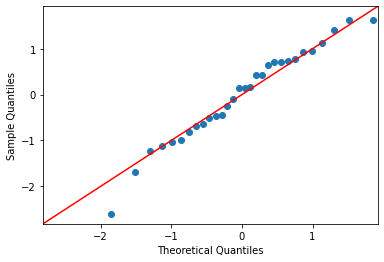

In [30]:
# pomocí QQ grafu
sm.qqplot(aku['kapacita_5'][aku['vyrobce']=='A'], line='45', fit=True)
plt.show()
# rozložení bodů podél přímky ukazuje na normální rozdělení dat

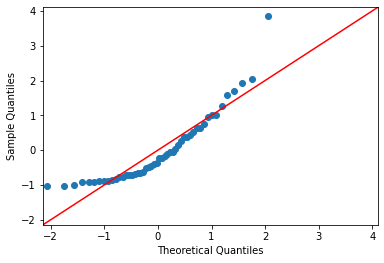

In [31]:
# Obdobný graf pro data zexponenciálního rozdělení ukazuje výrazný odklad od přímky. Z toho lze usuzovat, že data nemají normální rozdělení.
x = np.random.exponential(5, size=50)
sm.qqplot(x, line='45', fit=True)
plt.show()

In [32]:
# normalitu lze testovat např. Shapirovým-Wilkovým testem (H0: data mají normální rozdělení, H1: data nemají normální rozdělení)
stats.shapiro(aku['kapacita_5'][aku['vyrobce']=='A'])
# vyspoká p-hodnota ukazuje, že data nevykazují významnou odchylku od normality 

ShapiroResult(statistic=0.9714745879173279, pvalue=0.5802649855613708)

# Testy hypotéz, intervalové odhady

## Ověření normality pro jednotlivé kapacity a výrobce

In [33]:
aku[['kapacita_5', 'vyrobce']].groupby('vyrobce').apply(stats.shapiro)

vyrobce
C     (0.9658653736114502, 0.4130503237247467)
B    (0.9383649826049805, 0.06728947162628174)
A     (0.9714745879173279, 0.5802649855613708)
D     (0.9861747026443481, 0.9459457397460938)
dtype: object

In [34]:
aku[['kapacita_100', 'vyrobce']].groupby('vyrobce').apply(stats.shapiro)

vyrobce
C    (0.9675898551940918, 0.45529457926750183)
B     (0.9734573364257812, 0.5997429490089417)
A     (0.9716190695762634, 0.5843653678894043)
D     (0.9814878106117249, 0.8415166735649109)
dtype: object

Všechny p-hodnoty jsou vyšší než 0.05. Jednotlivé výběry můžeme považovat za výbery z normálního rozdělení.

## Dosahují akumulátory výrobce A po 5 cyklech deklarované kapacity?

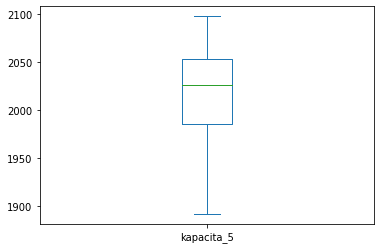

In [35]:
kap5A = aku['kapacita_5'][aku['vyrobce']=='A']
kap5A.plot.box();
# krabicový graf nenaznačuje výraznou odchylku od deklarované hodnoty


Testujeme H0: $\mu_A=2000$ proti H1: $\mu_A\neq 2000$

In [36]:
# oboustranný jednovýběrový t-test
result = stats.ttest_1samp(kap5A, popmean=2000)
print("Jednovýběrový t-test: p-hodnota={:f}".format(result.pvalue))

Jednovýběrový t-test: p-hodnota=0.048518


Na hladině významnosti 0.05 zamítáme H0. Střední hodnota kapacit akumumulátorů výrobce A po 5 cyklech vykazuje statisticky význanou odchylku od deklarované kapacity.

In [37]:
# jednostranný jednovýběrový t-test H0: \mu_A=2000, H1: \mu_A>2000
result = stats.ttest_1samp(kap5A, popmean=2000, alternative='greater')
print("Jednovýběrový t-test: p-hodnota={:f}".format(result.pvalue))
# pro H1: \mu_A<2000 ... alternative='less'
# pro H1: \mu_A<>2000 ... alternative='two-sided' (výchozí hodnota parametru)

Jednovýběrový t-test: p-hodnota=0.024259


---

## Liší se střední hodnoty kapacit akumulátorů výrobců B a D po 100 cyklech?

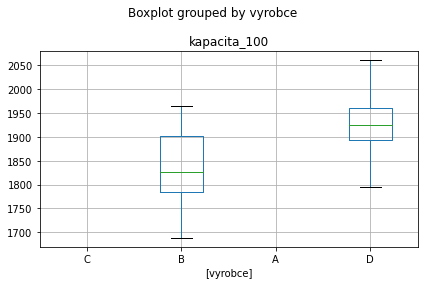

In [38]:
# vybere pouze aku vyrobcu B a D a vykreslí krabicove grafy 
aku[aku['vyrobce'].isin(['B', 'D'])].boxplot(column=['kapacita_100'], by=['vyrobce'])
plt.tight_layout()

In [39]:
kapB100 = aku['kapacita_100'][aku['vyrobce']=='B']
kapD100 = aku['kapacita_100'][aku['vyrobce']=='D']

Text(0, 0.5, 'kapacita')

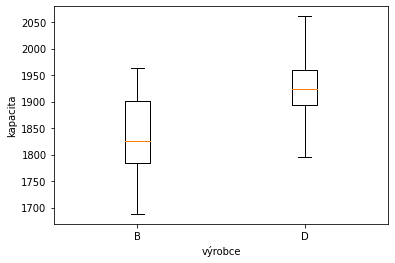

In [40]:
# krabicové grafy pomocí matplotlib
plt.boxplot([kapB100, kapD100])
plt.xticks(ticks=[1, 2], labels=['B', 'D'])
plt.xlabel('výrobce')
plt.ylabel('kapacita')

Krabicové grafy naznačují, že kapacity akamulátorů výrobce D jsou vyšší než výrobce B. Proto volíme jednostrannou alternativní hypotézu.

Test H0: $\mu_B=\mu_D$ proti H1: $\mu_B<\mu_D$

In [41]:
# dvouvýběrový t-test
test = stats.ttest_ind(kapB100, kapD100)
print("Dvouvýběrový t-test: p-hodnota={:f}".format(test.pvalue))

Dvouvýběrový t-test: p-hodnota=0.000003


Na hladině významnosti 0.05 zamítáme H0. Střední hodnoty kapacit po 100 cyklech akumulátorů výrobce D jsou vyšší než střední hodnoty kapacit akumulátorů výrobce B.

---

## Liší se rozptyly hodnoty kapacit akuamulátorů výrobců B a D po 100 cyklech?

H0: $\sigma_B^2=\sigma_D^2$, H1: $\sigma_B^2>\sigma_D^2$

In [42]:
# test rovnosti rozptylů není dostupný v použitých knihovnách, provedeme jej ručně
SB100 = kapB100.var()
SD100 = kapD100.var()
F = SB100/SD100
pval = 1-stats.f.cdf(F, len(kapB100)-1, len(kapD100)-1)
print("F-test: p-hodnota={:f}".format(pval))


F-test: p-hodnota=0.225281


Na hladině významnosti 0.05 nezamítáme H0. U akamulátorů výrobců B a D nebyl po 100 cyklech prokázán rozdíl v rozptylech kapacit.

---

## Liší se kapacity akumulátorů výrobce A po 5 a po 100 cyklech?

POZOR: Nejde o nezávislé výběry! Data jsou párová. Posuzujeme stř. hodnotu rozdílů po 5 a po 100 cyklech.

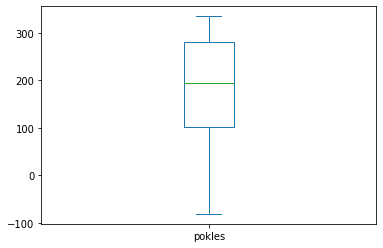

In [43]:
aku['pokles'][aku['vyrobce']=='A'].plot.box();


Krabicový graf ukazuje, že pokles kapacity u výrobce A je výrazně vyšší než 0. 

Střední hodnota poklesu kapacity: $\mu_{pA}$

Test H0: $\mu_{pA}=0$ proti H1: $\mu_{pA}>0$  

In [44]:
# Chybně (jako nezávislá data):
stats.ttest_ind(aku['kapacita_5'][aku['vyrobce']=='A'], aku['kapacita_100'][aku['vyrobce']=='A'])

Ttest_indResult(statistic=7.402334821424309, pvalue=6.177663764963653e-10)

In [45]:
# Správně pomocí párového t-testu (jako párová data):
stats.ttest_rel(aku['kapacita_5'][aku['vyrobce']=='A'], aku['kapacita_100'][aku['vyrobce']=='A'])

Ttest_relResult(statistic=9.260380518227795, pvalue=3.662123001232633e-10)

In [46]:
# Správně pomocí jednovýběrového t-testu:
stats.ttest_1samp(aku['pokles'][aku['vyrobce']=='A'], popmean=0)


Ttest_1sampResult(statistic=9.260380518227795, pvalue=3.662123001232633e-10)

In [47]:
result = stats.ttest_rel(aku['kapacita_5'][aku['vyrobce']=='A'], aku['kapacita_100'][aku['vyrobce']=='A'])
print("párový t-test: p-hodnota={:.10f}".format(result.pvalue))


párový t-test: p-hodnota=0.0000000004


Na hladině významnosti 0.05 zamítáme H0. U akamulátorů výrobce A dochází mezi 5 a 100 cyklem k poklesu stř. hodnoty kapacity.

---

## Intervalové odhady stř. hodot kapacit po 5 cyklech

In [48]:
# ruční výpočet intervalového odhadu  
alfa = 0.05
print('95% intervalové odhady stř. hodnot kapacit po 5 cyklech')
for v in aku['vyrobce'].unique():
    aku_v =  aku['kapacita_5'][aku['vyrobce']==v]  
    m = aku_v.mean() # výběrový průměr
    s = aku_v.std()  # výběrová směrodatná odchylka
    n = len(aku)
    t = stats.t.ppf(1-alfa/2, n-1)  # 1-alfa/2 kvantil studentova rozdělení
    d = t*s/n**0.5 # polovina délky konfidenčního intervalu
    td = m-d # dolní mez
    th = m+d # horn9 mez
    print('výrobce {}: ({:.0f}, {:.0f}) mAh'.format(v, td, th))

95% intervalové odhady stř. hodnot kapacit po 5 cyklech
výrobce A: (2010, 2027) mAh
výrobce B: (1962, 1977) mAh
výrobce C: (1984, 2009) mAh
výrobce D: (2028, 2039) mAh
